#### Data Loading and Pre-Processing

In [29]:
import pandas as pd 
import numpy as np
df=pd.read_csv('PopUSA00-23.csv')

In [30]:
df.shape

(285, 9)

In [31]:
df.describe()

,Price of Housing,Population,Interest Rates,Energy Prices,GDI,GDP
count,283.000000,285.000000,283.000000,284.000000,282.000000,282.000000
mean,175.080435,310.832211,2.234240,2.623268,16611.750862,16613.797936
std,48.539071,16.240854,1.909255,0.798503,4358.532661,4431.328005
min,100.551000,280.730000,0.250000,1.130000,10156.746000,10002.179000
25%,142.405000,296.760000,0.750000,2.052250,13485.730000,13324.204000
50%,167.335000,312.400000,1.500000,2.588000,15772.415000,15744.969500
75%,193.215000,325.510000,3.000000,3.268000,19667.687000,19692.595000
max,306.720000,335.340000,6.250000,5.058000,26300.161000,27063.012000


In [32]:
df.head()

,DATE,Price of Housing,POPPUL,Population,Interest Rates,Nasdaq,Energy Prices,GDI,GDP
0,01-01-2000,100.551,280.73 million,280.73,5.00,3633.1085,1.301,10156.746,10002.179
1,01-02-2000,101.339,280.94 million,280.94,5.24,4012.3705,1.369,10156.746,10002.179
2,01-03-2000,102.127,281.16 million,281.16,5.34,4436.54,1.541,10156.746,10002.179
3,01-04-2000,102.923,281.42 million,281.42,5.50,3742.25,1.506,10287.796,10247.720
4,01-05-2000,103.678,281.64 million,281.64,5.71,3412.798636,1.498,10287.796,10247.720


In [33]:
df=df.drop(['POPPUL'],axis=1)

In [34]:
df=df.dropna()

In [35]:
df.isna().sum()

DATE                0
Price of Housing    0
Population          0
Interest Rates      0
Nasdaq              0
Energy Prices       0
GDI                 0
GDP                 0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282 entries, 0 to 281
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              282 non-null    object 
 1   Price of Housing  282 non-null    float64
 2   Population        282 non-null    float64
 3   Interest Rates    282 non-null    float64
 4   Nasdaq            282 non-null    object 
 5   Energy Prices     282 non-null    float64
 6   GDI               282 non-null    float64
 7   GDP               282 non-null    float64
dtypes: float64(6), object(2)
memory usage: 19.8+ KB


In [37]:
df['Nasdaq'] = df['Nasdaq'].astype(float)

In [38]:
df.shape

(282, 8)

In [39]:
df.columns

Index(['DATE', 'Price of Housing', 'Population', 'Interest Rates', 'Nasdaq',
       'Energy Prices', 'GDI', 'GDP'],
      dtype='object')

#### EDA

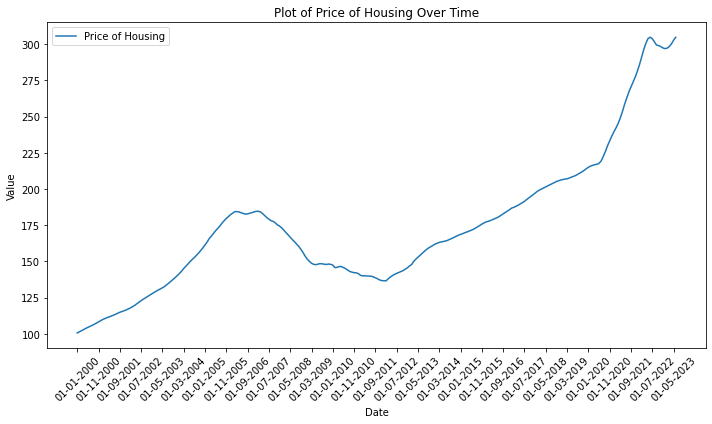

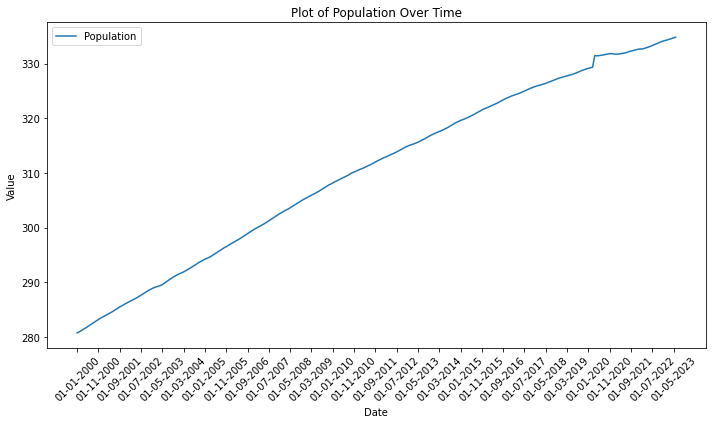

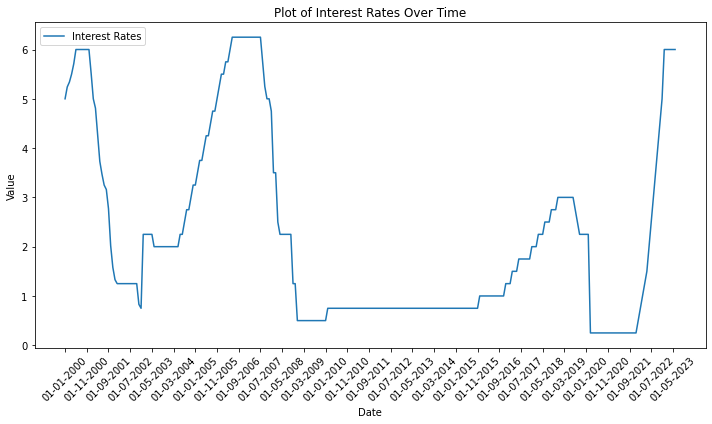

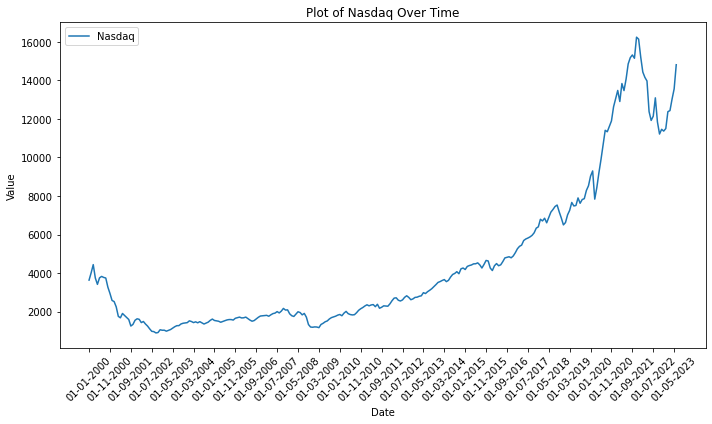

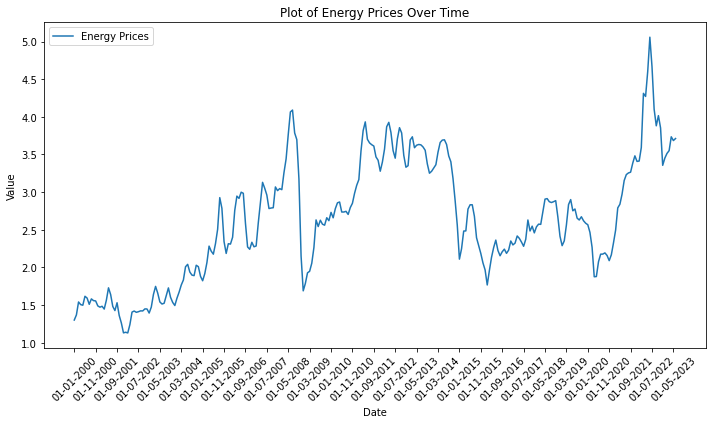

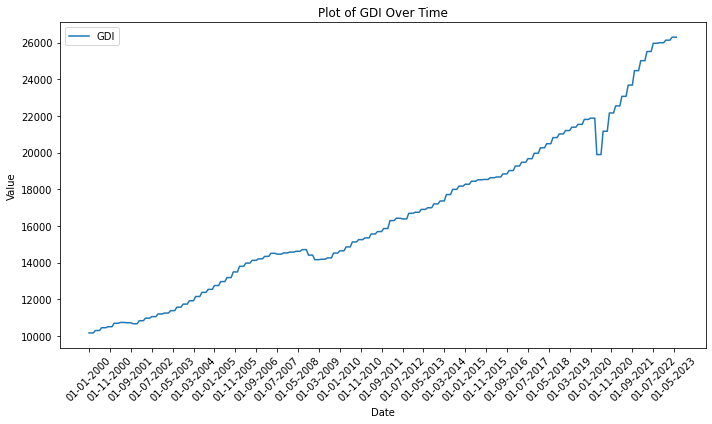

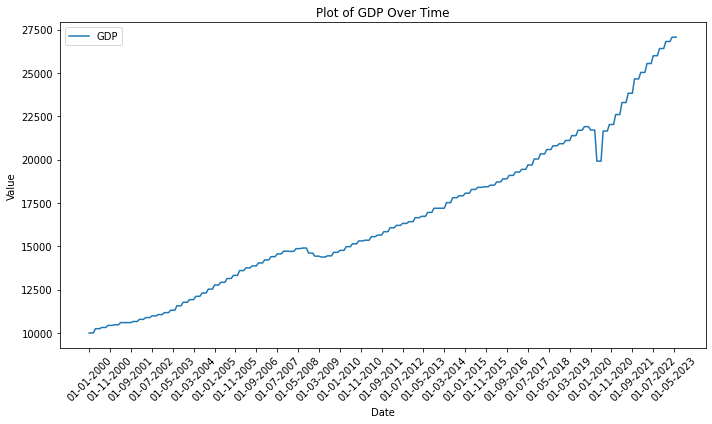

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

n = 10
m = 25
for column in df.columns:
    if column != 'DATE':
        plt.figure(figsize=(10, 6))
        plt.plot(df['DATE'], df[column], label=column)
        
        
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.title(f'Plot of {column} Over Time')
        plt.legend(loc='upper left')

        
        x_labels = df['DATE'][::n].tolist()
        if column == 'Nasdaq':
            y_labels = df['Nasdaq'][::m].tolist()
            plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
            

        plt.xticks(x_labels, rotation=45) 
        plt.tight_layout()
        plt.show()


<AxesSubplot:>

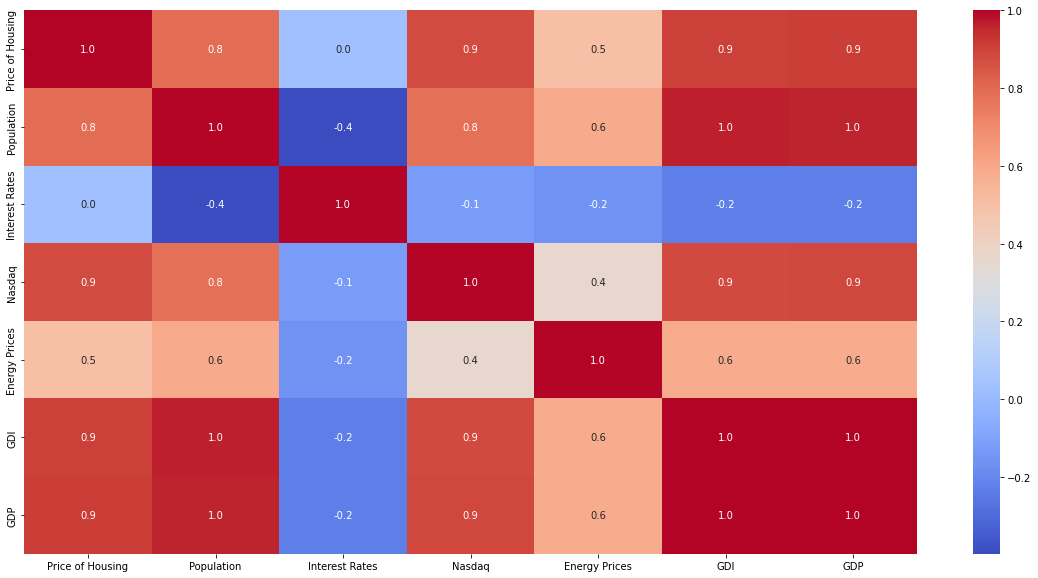

In [41]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(),annot=True, fmt=".1f", cmap='coolwarm')

#### Model Building

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop(columns=['Price of Housing','DATE','GDP'])
y = df['Price of Housing']

# Spliting the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a pipeline for scaling and training models
pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('model', LinearRegression())
])

models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('Decision Tree Regressor', DecisionTreeRegressor()),
    ('Random Forest Regressor', RandomForestRegressor()),
    ('Gradient Boosting Regressor', GradientBoostingRegressor())
]

# Training Loop
for name, model in models:
    pipeline.set_params(model=model)  
    pipeline.fit(X_train, y_train)  
    
    y_pred = pipeline.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'Model: {name}')
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'R-squared (R2): {r2:.2f}')
    print('-' * 30)

Model: Linear Regression
Mean Squared Error: 222.61
R-squared (R2): 0.91
------------------------------
Model: Ridge Regression
Mean Squared Error: 229.47
R-squared (R2): 0.90
------------------------------
Model: Lasso Regression
Mean Squared Error: 261.38
R-squared (R2): 0.89
------------------------------
Model: Decision Tree Regressor
Mean Squared Error: 6.20
R-squared (R2): 1.00
------------------------------
Model: Random Forest Regressor
Mean Squared Error: 1.37
R-squared (R2): 1.00
------------------------------
Model: Gradient Boosting Regressor
Mean Squared Error: 4.89
R-squared (R2): 1.00
------------------------------
